In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import Layers, Metrics, Callback
import matplotlib.pyplot as plt

In [ ]:
(train_images, _), (test_images, _) = datasets.cifar10.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
train_images = train_images[:50000]
test_images = test_images[:10000]

In [ ]:
plt.figure()
plt.show(train_images[0])

<Figure size 640x480 with 0 Axes>

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 640x480 with 0 Axes>

In [ ]:
# snr [dB]
SNR = 20
# average power
P = 1
# noise power
N = P/10**(SNR/10)
# image dimension (source bandwidth)
n = 32*32*3
# channel dimension (channel bandwidth)
k = 8**2*16
# bandwidth compression ratio
k_n = k/n
# number of filters in the last convolution layer of the encoder
c = int(2*k/8**2)

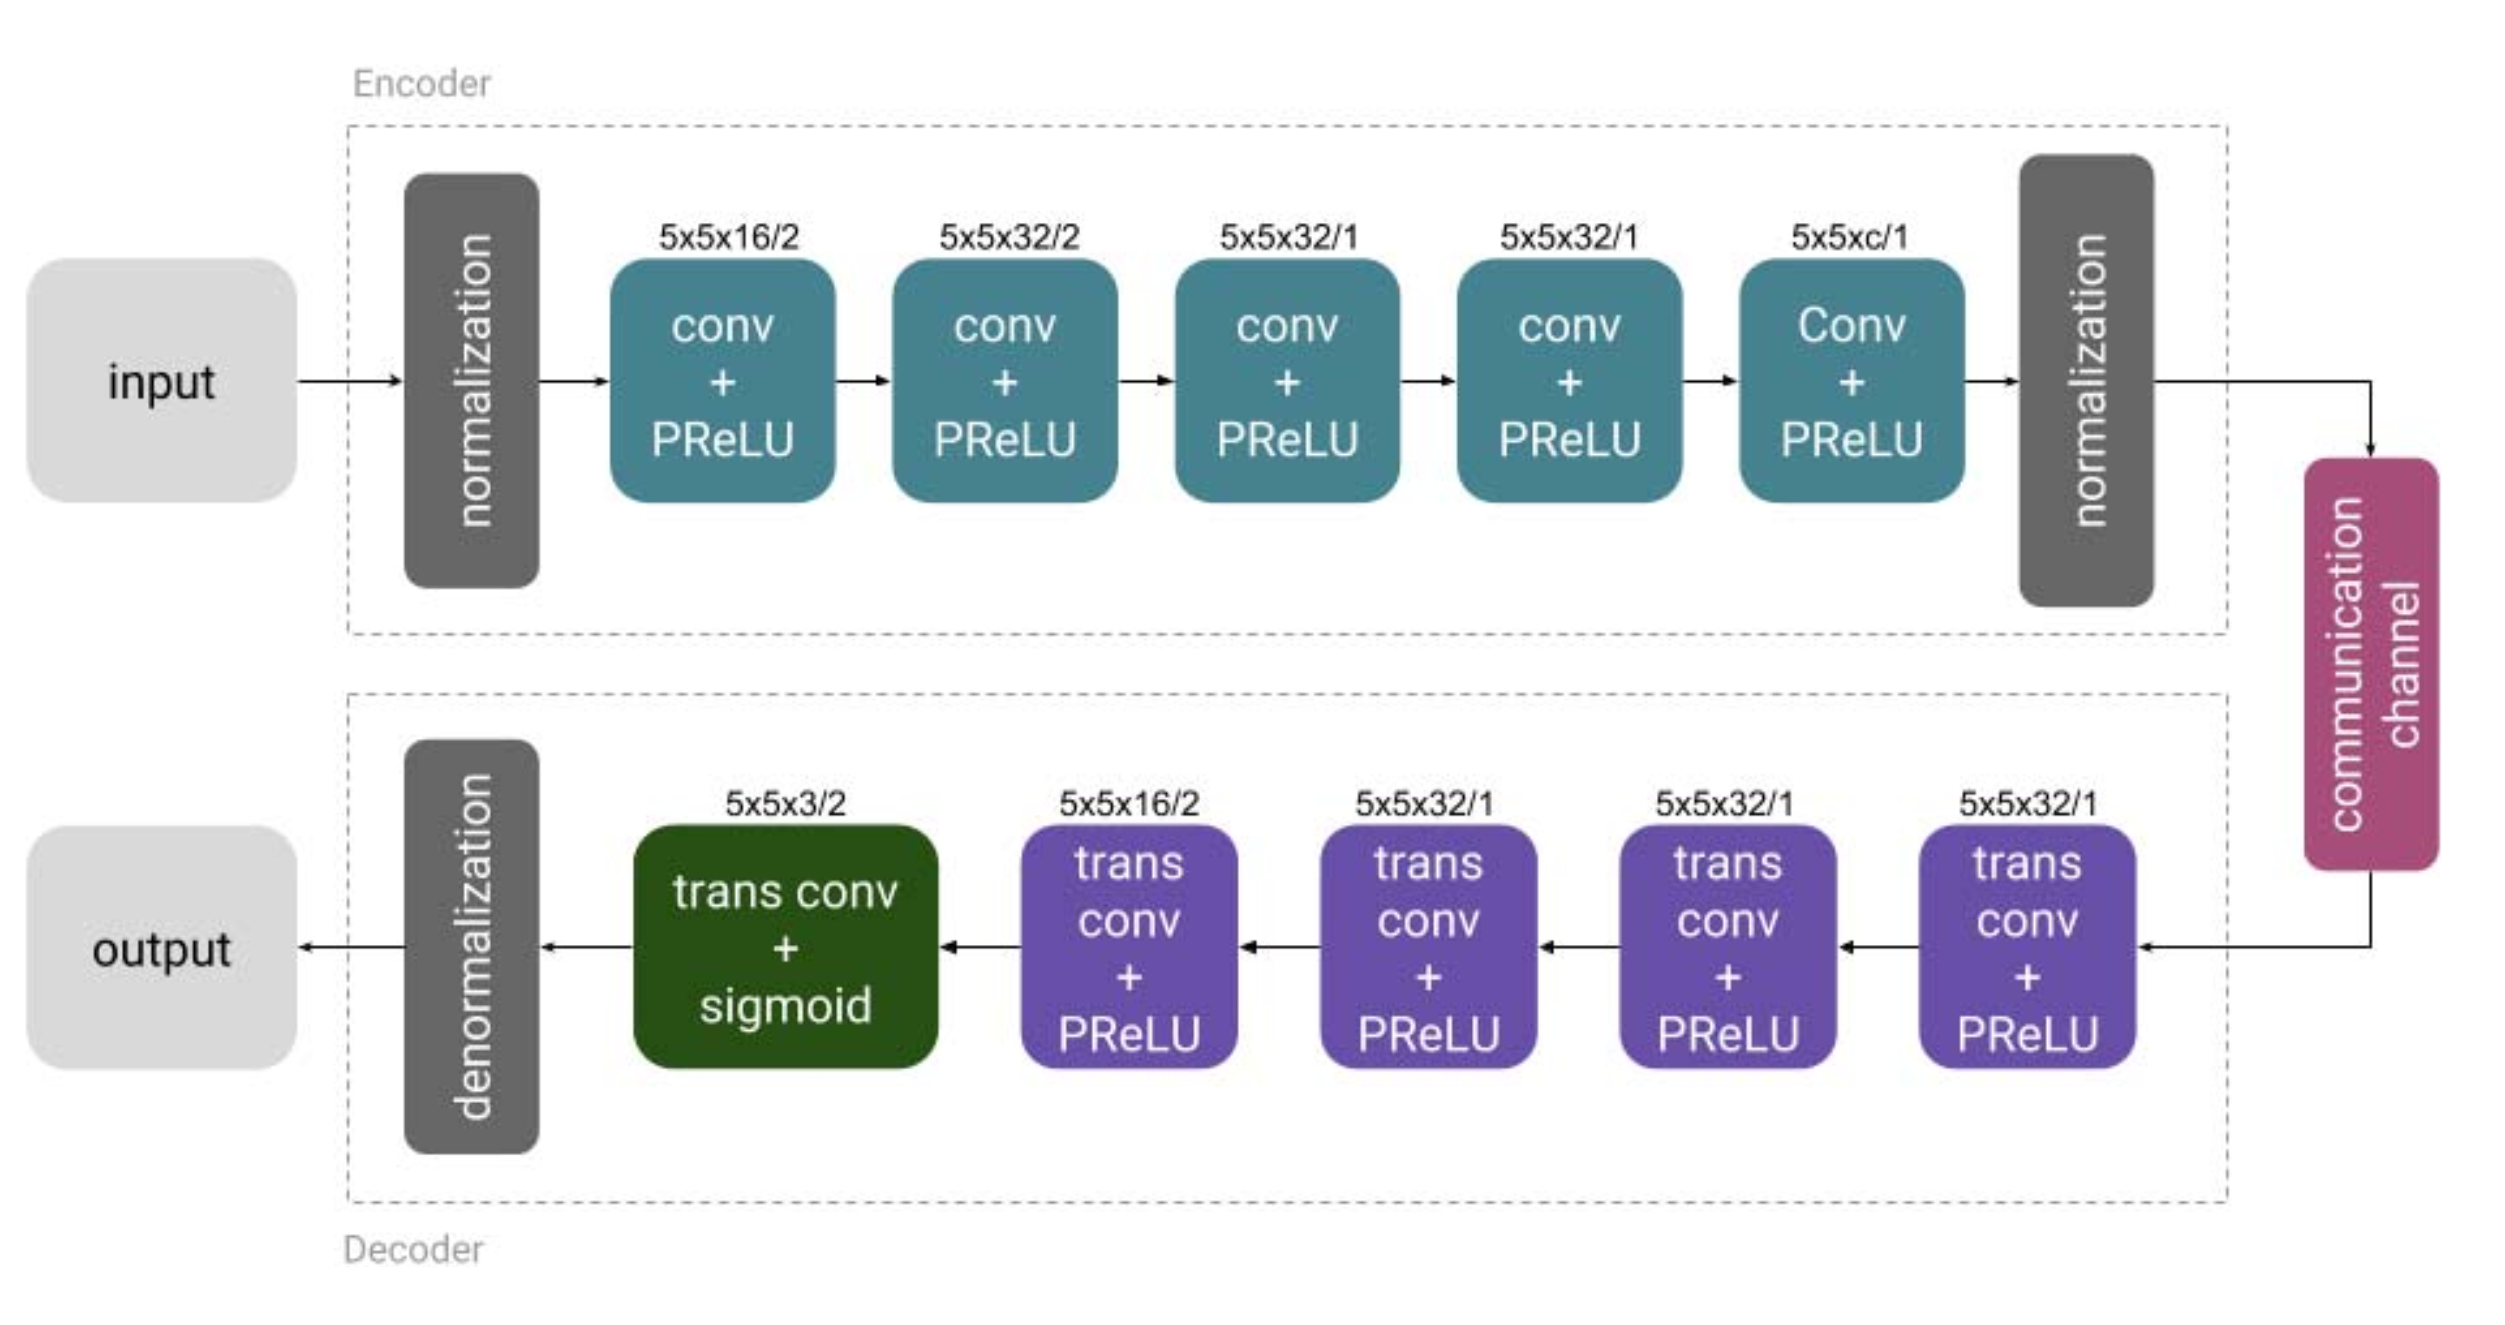

In [ ]:
model = models.Sequential(name='DeepJSCC')
# model.add(layers.Normalization())
# encorder
model.add(layers.Conv2D(16, (5, 5), strides=2, padding='same', input_shape=(32, 32, 3), name='Encoder_Conv2D_1'))
model.add(layers.PReLU(name='Encoder_PReLU_1'))

model.add(layers.Conv2D(32, (5, 5), strides=2, padding='same', name='Encoder_Conv2D_2'))
model.add(layers.PReLU(name='Encoder_PReLU_2'))

model.add(layers.Conv2D(32, (5, 5), strides=1, padding='same', name='Encoder_Conv2D_3'))
model.add(layers.PReLU(name='Encoder_PReLU_3'))

model.add(layers.Conv2D(32, (5, 5), strides=1, padding='same', name='Encoder_Conv2D_4'))
model.add(layers.PReLU(name='Encoder_PReLU_4'))

model.add(layers.Conv2D(c, (5, 5), strides=1, padding='same', name='Encoder_Conv2D_5'))
model.add(layers.PReLU(name='Encoder_PReLU_5'))

model.add(Layers.Normalization(k,P))

# add channel noise (AWGN)
model.add(Layers.AWGN_Channel(N))

# encorder
model.add(layers.Conv2DTranspose(32, (5, 5), strides=1, padding='same', name='Decoder_TransConv2D_1'))
model.add(layers.PReLU(name='Decoder_PReLU_1'))
model.add(layers.Conv2DTranspose(32, (5, 5), strides=1, padding='same', name='Decoder_TransConv2D_2'))
model.add(layers.PReLU(name='Decoder_PReLU_2'))
model.add(layers.Conv2DTranspose(32, (5, 5), strides=1, padding='same', name='Decoder_TransConv2D_3'))
model.add(layers.PReLU(name='Decoder_PReLU_3'))
model.add(layers.Conv2DTranspose(16, (5, 5), strides=2, padding='same', name='Decoder_TransConv2D_4'))
model.add(layers.PReLU(name='Decoder_PReLU_4'))
model.add(layers.Conv2DTranspose(3, (5, 5), strides=2, padding='same',  activation='sigmoid', name='Decoder_TransConv2D_5'))


c:\Users\naoki\PythonVenv\StudyVenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "DeepJSCC"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Encoder_Conv2D_1 (Conv2D)       │ (None, 16, 16, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_PReLU_1 (PReLU)         │ (None, 16, 16, 16)     │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_Conv2D_2 (Conv2D)       │ (None, 8, 8, 32)       │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_PReLU_2 (PReLU)         │ (None, 8, 8, 32)       │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_Conv2D_3 (Conv2D)       │ (None, 8, 8, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_PReLU_3 (PReLU)         │ (None, 8, 8, 32)       │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_Conv2D_4 (Conv2D)       │ (None, 8, 8, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_PReLU_4 (PReLU)         │ (None, 8, 8, 32)       │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_Conv2D_5 (Conv2D)       │ (None, 8, 8, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_PReLU_5 (PReLU)         │ (None, 8, 8, 32)       │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_1 (Normalization) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ awgn__channel_1 (AWGN_Channel)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_TransConv2D_1           │ (None, 8, 8, 32)       │        25,632 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_PReLU_1 (PReLU)         │ (None, 8, 8, 32)       │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_TransConv2D_2           │ (None, 8, 8, 32)       │        25,632 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_PReLU_2 (PReLU)         │ (None, 8, 8, 32)       │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_TransConv2D_3           │ (None, 8, 8, 32)       │        25,632 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_PReLU_3 (PReLU)         │ (None, 8, 8, 32)       │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_TransConv2D_4           │ (None, 16, 16, 16)     │        12,816 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_PReLU_4 (PReLU)         │ (None, 16, 16, 16)     │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_TransConv2D_5           │ (None, 32, 32, 3)      │         1,203 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,387 (798.39 KB)

 Trainable params: 204,387 (798.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=10**(-3)),
              loss=tf.keras.losses.MSE,
              metrics=[Metrics.PSNR])

In [ ]:
custom_lr_scheduler = Callback.CustomLearningRateScheduler(iteration_change=500000, lr=10**(-4))

In [ ]:
history = model.fit(train_images, train_images,
                    validation_data=[test_images, test_images],
                    epochs=epochs,
                    batch_size=64)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - loss: 0.0323 - psnr: 16.2123 - val_loss: 0.0105 - val_psnr: 20.2875
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - loss: 0.0094 - psnr: 20.7941 - val_loss: 0.0071 - val_psnr: 21.9972
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - loss: 0.0069 - psnr: 22.1151 - val_loss: 0.0053 - val_psnr: 23.3293
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - loss: 0.0055 - psnr: 23.0834 - val_loss: 0.0047 - val_psnr: 23.8245
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - loss: 0.0049 - psnr: 23.6084 - val_loss: 0.0043 - val_psnr: 24.1895
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - loss: 0.0044 - psnr: 24.0726 - val_loss: 0.0040 - val_psnr: 24.5296
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - loss: 0.0039 - psnr: 24.5802 - val_loss: 0.0036 - val_psnr: 25.0346
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - loss: 0.0036 - psnr: 24.9878 - val_loss: 0.0034 - val_psnr: 25.2254


KeyboardInterrupt: 

In [ ]:
model.save('model')

In [ ]:
model.evaluate(test_images, test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 4.9530e-04 - psnr: 33.9651


[0.0004887044779025018, 33.99262237548828]

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_images, verbose=2)

313/313 - 5s - 17ms/step - loss: 4.8870e-04 - psnr: 33.9926


In [ ]:
print(test_acc)

33.99262237548828


In [ ]:
class PSNR(tf.keras.metrics.Metric):
  def __init__(self, name='PSNR'):
    super(PSNR, self).__init__(name=name)
    self.true_positives = self.add_weight(name='PSNR', initializer='zeros')
  
  def update_state(self, y_true, y_pred, sample_weight=None):
    self.true_positives.assign_add(tf.image.psnr(y_true, y_pred, max_val=1.0))
  
  def result(self):
    return self.true_positives
  
  def reset_state(self):
    # The state of the metric will be reset at the start of each epoch.
    self.true_positives.assign(0.0)

In [ ]:
import tensorflow as tf

# 例としてランダムな3次元テンソルを生成
a = tf.random.uniform((5, 5, 3))  # 5x5x3のランダムなテンソル
b = tf.random.uniform((5, 5, 3))  # 5x5x3のランダムなテンソル

# 第1チャネル（第3次元が1）のすべての行と列
a_channel_1 = a[:, :, 0]

# 第2チャネル（第3次元が2）のすべての行と列
b_channel_2 = b[:, :, 1]

# 2つのチャネルの要素ごとの和
x = a_channel_1 + b_channel_2

# 結果を表示
print("a_channel_1:\n", a_channel_1.numpy())
print("b_channel_2:\n", b_channel_2.numpy())
print("x:\n", x.numpy())


a_channel_1:
 [[0.5381533  0.7310338  0.83608806 0.04636943 0.12849164]
 [0.6863985  0.48050284 0.01983035 0.11024725 0.0525347 ]
 [0.8356756  0.67823255 0.9669837  0.16425633 0.51994586]
 [0.51917684 0.16890728 0.83609915 0.42699516 0.19629884]
 [0.6903924  0.1783694  0.7452196  0.02025771 0.81580496]]
b_channel_2:
 [[0.3414576  0.37928474 0.5902978  0.90516675 0.30525017]
 [0.95475554 0.3806789  0.66783094 0.9588344  0.33024108]
 [0.12459648 0.09367847 0.4337951  0.5054642  0.573761  ]
 [0.35988343 0.92959917 0.85269904 0.59179175 0.64758027]
 [0.31420803 0.17077363 0.26187015 0.1789689  0.40122104]]
x:
 [[0.8796109  1.1103185  1.4263859  0.9515362  0.4337418 ]
 [1.641154   0.86118174 0.6876613  1.0690817  0.38277578]
 [0.9602721  0.771911   1.4007788  0.66972053 1.0937068 ]
 [0.87906027 1.0985065  1.6887982  1.0187869  0.8438791 ]
 [1.0046004  0.34914303 1.0070897  0.19922662 1.217026  ]]


In [ ]:
a = tf.constant(1)
b = tf.constant(1)
c = a
d = c + 1
tf.print(a,d)

1 2


In [ ]:
a = []
for i in range(5):
  a.append([[1],[1]])
print(a)

[[[1], [1]], [[1], [1]], [[1], [1]], [[1], [1]], [[1], [1]]]


In [ ]:
import tensorflow as tf

# 初期の空のリストを作成
a = []

# ループで要素を追加
for i in range(5):
    new_element = tf.constant([[1], [1]], dtype=tf.int32)
    a.append(new_element)

# リストをテンソルに変換
a = tf.stack(a, axis=0)

# 結果を表示
print(a)


tf.Tensor(
[[[1]
  [1]]

 [[1]
  [1]]

 [[1]
  [1]]

 [[1]
  [1]]

 [[1]
  [1]]], shape=(5, 2, 1), dtype=int32)


In [ ]:
# 初期の空のテンソルを作成
a = tf.constant([], shape=(0, 1), dtype=tf.complex128)
print(a)
# ループで要素を追加
for i in range(5):
    new_element = tf.constant([[1]], dtype=tf.complex128)
    a = tf.concat([a, new_element], axis=0)

# 結果を表示
print(a)


tf.Tensor([], shape=(0, 1), dtype=complex128)
tf.Tensor(
[[1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]], shape=(5, 1), dtype=complex128)


In [ ]:
y = test(1, 2,3)

TypeError: test() takes 1 positional argument but 3 were given

In [ ]:
import numpy as np
z = 1+2j
y = z/np.sqrt(z.conjugate()*z)
print(y)
print(abs(y))

(0.4472135954999579+0.8944271909999159j)
0.9999999999999999


In [ ]:
a = np.array([[1+1j, 1+2j, 1+3j], [2+1j, 2+2j, 2+3j], [3+1j, 3+2j, 3+3j]])
print(a)
print(np.conjugate(a)*a)
b = a/np.sqrt((np.conjugate(a)*a))
b = a/np.sqrt(np.matmul(np.conjugate(a.T), a))
print(b)
print(np.abs(b))

[[1.+1.j 1.+2.j 1.+3.j]
 [2.+1.j 2.+2.j 2.+3.j]
 [3.+1.j 3.+2.j 3.+3.j]]
[[ 2.+0.j  5.+0.j 10.+0.j]
 [ 5.+0.j  8.+0.j 13.+0.j]
 [10.+0.j 13.+0.j 18.+0.j]]
[[0.24253563+0.24253563j 0.28007835+0.40126386j 0.33094762+0.525305j  ]
 [0.40126386+0.28007835j 0.39223227+0.39223227j 0.39766378+0.4910757j ]
 [0.525305  +0.33094762j 0.4910757 +0.39766378j 0.46852129+0.46852129j]]
[[0.34299717 0.489343   0.62086365]
 [0.489343   0.5547002  0.63189542]
 [0.62086365 0.63189542 0.66258916]]


In [ ]:
import tensorflow as tf

# 形状が (64,) のテンソルを生成
divisors = tf.random.uniform((64,), minval=1, maxval=10)

# (64,) のテンソルを (64, 1, 1, 1) に reshape
divisors_reshaped = tf.reshape(divisors, (64, 1, 1, 1))

# (64, 1, 1, 1) のテンソルをブロードキャストして (64, 8, 8, 4) に拡張
divisors_expanded = tf.broadcast_to(divisors_reshaped, (64, 8, 8, 4))

# 結果を確認
print("Original divisors shape:", divisors.shape)
print("Reshaped divisors shape:", divisors_reshaped.shape)
print("Expanded divisors shape:", divisors_expanded.shape)


Original divisors shape: (64,)
Reshaped divisors shape: (64, 1, 1, 1)
Expanded divisors shape: (64, 8, 8, 4)


In [ ]:
tf.print(divisors_expanded)

[[[[136.817291 136.817291 136.817291 136.817291]
   [136.817291 136.817291 136.817291 136.817291]
   [136.817291 136.817291 136.817291 136.817291]
   ...
   [136.817291 136.817291 136.817291 136.817291]
   [136.817291 136.817291 136.817291 136.817291]
   [136.817291 136.817291 136.817291 136.817291]]

  [[136.817291 136.817291 136.817291 136.817291]
   [136.817291 136.817291 136.817291 136.817291]
   [136.817291 136.817291 136.817291 136.817291]
   ...
   [136.817291 136.817291 136.817291 136.817291]
   [136.817291 136.817291 136.817291 136.817291]
   [136.817291 136.817291 136.817291 136.817291]]

  [[136.817291 136.817291 136.817291 136.817291]
   [136.817291 136.817291 136.817291 136.817291]
   [136.817291 136.817291 136.817291 136.817291]
   ...
   [136.817291 136.817291 136.817291 136.817291]
   [136.817291 136.817291 136.817291 136.817291]
   [136.817291 136.817291 136.817291 136.817291]]

  ...

  [[136.817291 136.817291 136.817291 136.817291]
   [136.817291 136.817291 136.81729

In [ ]:
import tensorflow as tf

# 例としてランダムなテンソルを生成
tensor = tf.random.uniform((64, 8, 8, 4))

# 各次元に沿って和を計算し、元の形状を維持する方法
sum_over_axis_0 = tf.reduce_sum(tensor, axis=[1,2,3], keepdims=True)  # 64を保持しない
divisors_expanded = tf.broadcast_to(sum_over_axis_0, (64, 8, 8, 4))
sum_over_axis_1 = tf.reduce_sum(tensor, axis=1, keepdims=True)  # 8を保持しない
sum_over_axis_2 = tf.reduce_sum(tensor, axis=2, keepdims=True)  # 8を保持しない
sum_over_axis_3 = tf.reduce_sum(tensor, axis=3, keepdims=True)  # 4を保持しない

# 結果を確認
print("Original tensor shape:", tensor.shape)
print("Sum over axis 0 shape:", sum_over_axis_0.shape)
print("Sum over axis 1 shape:", sum_over_axis_1.shape)
print("Sum over axis 2 shape:", sum_over_axis_2.shape)
print("Sum over axis 3 shape:", sum_over_axis_3.shape)


Original tensor shape: (64, 8, 8, 4)
Sum over axis 0 shape: (64, 1, 1, 1)
Sum over axis 1 shape: (64, 1, 8, 4)
Sum over axis 2 shape: (64, 8, 1, 4)
Sum over axis 3 shape: (64, 8, 8, 1)


In [4]:
random = tf.random.normal([64, 1], mean=0.0, stddev=1.0, dtype=tf.float32)
print(random)
random = tf.tile(random, [1, 8])
print(random)

tf.Tensor(
[[-0.3805891 ]
 [ 1.3999614 ]
 [ 0.33855653]
 [ 1.1794499 ]
 [ 0.39474994]
 [-1.3886055 ]
 [ 1.2417907 ]
 [ 0.11171974]
 [ 1.0613552 ]
 [ 1.265383  ]
 [-1.2906076 ]
 [ 0.79224163]
 [-1.3291757 ]
 [ 0.9276133 ]
 [-0.0506693 ]
 [ 0.705606  ]
 [ 0.41071978]
 [ 0.06804767]
 [ 0.8235054 ]
 [-0.2140687 ]
 [-0.37810442]
 [-1.4198362 ]
 [-0.22558193]
 [ 0.03527718]
 [-0.04497632]
 [ 1.552894  ]
 [ 0.7917785 ]
 [ 0.8679389 ]
 [-0.24443217]
 [ 0.24425757]
 [ 0.24943835]
 [-0.809769  ]
 [ 0.7969654 ]
 [-0.4839479 ]
 [-1.3042713 ]
 [ 0.08912588]
 [ 0.68535334]
 [-0.30601558]
 [ 0.13524775]
 [-1.0612814 ]
 [-0.43548903]
 [ 1.2852601 ]
 [ 0.32112324]
 [-1.2435105 ]
 [ 0.23039618]
 [ 0.69493496]
 [-0.01517308]
 [-0.42377433]
 [ 0.2837572 ]
 [-0.86827004]
 [-0.14602105]
 [-0.8440314 ]
 [-0.5330415 ]
 [-0.5152993 ]
 [ 1.1025329 ]
 [ 1.2354933 ]
 [ 0.14235556]
 [-0.25156328]
 [ 1.6764607 ]
 [ 1.1699688 ]
 [-0.20165752]
 [ 0.02764253]
 [-0.9708176 ]
 [-0.63826174]], shape=(64, 1), dtype=float3

In [58]:
import tensorflow as tf
x = tf.constant([[0.1,0.2],[0.3,0.4]], dtype=tf.float32)
x_T = tf.transpose(x, perm=[1,0])
print(x)
print(x_T)
x_Tx = tf.matmul(x_T, x)
print(x_Tx)
x_Tx = tf.sqrt(x_Tx)
print(x_Tx)
x_Tx_i = tf.linalg.inv(x_Tx)
print(x_Tx_i)
xx_Tx_i = tf.matmul(x, x_Tx_i)
print(xx_Tx_i)

tf.Tensor(
[[0.1 0.2]
 [0.3 0.4]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.1 0.3]
 [0.2 0.4]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.1        0.14      ]
 [0.14       0.20000002]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.31622776 0.37416574]
 [0.37416574 0.44721362]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 314.6396  -263.24634]
 [-263.24634  222.48375]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-21.18531   18.172115]
 [-10.906662  10.019592]], shape=(2, 2), dtype=float32)


In [14]:
import tensorflow as tf
x = tf.constant([[1,2],[3,4]], dtype=tf.float32)
x_T = tf.transpose(x, perm=[1,0])
print(x)
print(x_T)
x_Tx = tf.multiply(x_T, x)
print(x_Tx)
x_Tx = tf.sqrt(x_Tx)
print(x_Tx)
xx_Tx_i = tf.divide(x, x_Tx)
print(xx_Tx_i)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 3.]
 [2. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 1.  6.]
 [ 6. 16.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.        2.4494898]
 [2.4494898 4.       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.         0.81649655]
 [1.2247448  1.        ]], shape=(2, 2), dtype=float32)


In [50]:
import tensorflow as tf
x = tf.constant([[0.2,0.2],[0.5,0.5]], dtype=tf.float32)
x_T = tf.transpose(x, perm=[1,0])
print(x)
print(x_T)
x_Tx = tf.matmul(x_T, x)
print(x_Tx)
x_Tx = tf.sqrt(x_Tx)
print(x_Tx)
xx_Tx_i = x/x_Tx
print(xx_Tx_i)
print(tf.reduce_sum(xx_Tx_i))

tf.Tensor(
[[0.2 0.2]
 [0.5 0.5]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2 0.5]
 [0.2 0.5]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.29 0.29]
 [0.29 0.29]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.53851646 0.53851646]
 [0.53851646 0.53851646]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.3713907  0.3713907 ]
 [0.92847675 0.92847675]], shape=(2, 2), dtype=float32)
tf.Tensor(2.5997348, shape=(), dtype=float32)


In [62]:
import tensorflow as tf
x = tf.constant([[0.2,0.2],[0.5,0.5]], dtype=tf.complex64)
x_T = tf.transpose(x, perm=[1,0])
print(x)
print(x_T)
norm = tf.norm(x)
print(norm)
x_x_Tx = x/tf.sqrt(norm)
print(x_x_Tx)
print(tf.reduce_sum(x_x_Tx))

tf.Tensor(
[[0.2+0.j 0.2+0.j]
 [0.5+0.j 0.5+0.j]], shape=(2, 2), dtype=complex64)
tf.Tensor(
[[0.2+0.j 0.5+0.j]
 [0.2+0.j 0.5+0.j]], shape=(2, 2), dtype=complex64)
tf.Tensor((0.7615773+0j), shape=(), dtype=complex64)
tf.Tensor(
[[0.22917804+0.j 0.22917804+0.j]
 [0.5729451 +0.j 0.5729451 +0.j]], shape=(2, 2), dtype=complex64)
tf.Tensor((1.6042464+0j), shape=(), dtype=complex64)


In [4]:
import numpy as np
x = np.array([[0.2,0.2],[0.2,0.2]])
print(2*x/np.sqrt(0.16))

[[1. 1.]
 [1. 1.]]


In [23]:
import tensorflow as tf
x = tf.constant([[0.2,0.3],[0.2,0.5]], dtype=tf.float32)
V_all = np.sqrt(tf.reduce_sum(tf.square(x)))
print(V_all)
# z = 2*x/tf.norm(x, axis=[0,1])
z = 2*x/V_all
print(z)
print((tf.reduce_mean(tf.square(z))))

0.6480741
tf.Tensor(
[[0.61721337 0.9258201 ]
 [0.61721337 1.5430335 ]], shape=(2, 2), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [39]:
import tensorflow as tf
even = tf.constant([[[1,0]]])
print(even)
# even = tf.expand_dims(even, [0])
# print(even)
even = tf.expand_dims(even, [-1])
print(even)
even = tf.tile(even, [1,8,4,1])
print(even)

tf.Tensor([[[1 0]]], shape=(1, 1, 2), dtype=int32)
tf.Tensor(
[[[[1]
   [0]]]], shape=(1, 1, 2, 1), dtype=int32)
tf.Tensor(
[[[[1]
   [0]
   [1]
   [0]
   [1]
   [0]
   [1]
   [0]]

  [[1]
   [0]
   [1]
   [0]
   [1]
   [0]
   [1]
   [0]]

  [[1]
   [0]
   [1]
   [0]
   [1]
   [0]
   [1]
   [0]]

  [[1]
   [0]
   [1]
   [0]
   [1]
   [0]
   [1]
   [0]]

  [[1]
   [0]
   [1]
   [0]
   [1]
   [0]
   [1]
   [0]]

  [[1]
   [0]
   [1]
   [0]
   [1]
   [0]
   [1]
   [0]]

  [[1]
   [0]
   [1]
   [0]
   [1]
   [0]
   [1]
   [0]]

  [[1]
   [0]
   [1]
   [0]
   [1]
   [0]
   [1]
   [0]]]], shape=(1, 8, 8, 1), dtype=int32)


In [41]:
import tensorflow as tf

# 元のデータ
data = tf.constant([1,2,3,4,5,6,7,8], dtype=tf.int32)

# インデックス
indices = tf.constant([0, 0, 2, 2, 4, 4, 6, 6], dtype=tf.int32)

# インデックスに基づいてデータを取得
result = tf.gather(data, indices)

print(result.numpy())


[1 1 3 3 5 5 7 7]


In [42]:
import tensorflow as tf

# 元のデータ
array1 = tf.constant([0, 2, 4, 6], dtype=tf.int32)
array2 = tf.constant([1, 3, 5, 7], dtype=tf.int32)

# データをスタックして、交互に並べるための準備
stacked = tf.stack([array1, array2], axis=1)

# 形状を整えてフラットな1次元テンソルに変換
result = tf.reshape(stacked, [-1])

print(result.numpy())


[0 1 2 3 4 5 6 7]


In [7]:
import tensorflow as tf
random = tf.random.Generator.from_seed(42)
for i in range(10):
  print(random.normal([]))

tf.Tensor(-0.7565803, shape=(), dtype=float32)
tf.Tensor(0.7093353, shape=(), dtype=float32)
tf.Tensor(0.9029392, shape=(), dtype=float32)
tf.Tensor(-1.2469416, shape=(), dtype=float32)
tf.Tensor(0.030131087, shape=(), dtype=float32)
tf.Tensor(-0.74721587, shape=(), dtype=float32)
tf.Tensor(0.17522676, shape=(), dtype=float32)
tf.Tensor(-0.28565946, shape=(), dtype=float32)
tf.Tensor(1.4680984, shape=(), dtype=float32)
tf.Tensor(0.35215586, shape=(), dtype=float32)
